In [1]:
import pandas as pd 

df = pd.read_csv('most_subscribed_youtube_channels.csv')
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [2]:
# Import libraries to work with data
import numpy as np

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for statistics calculation
from scipy.stats import linregress

In [3]:
df.shape

(1000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [5]:
df.describe().style.format(thousands=",",precision=1)

,rank,started
count,"1,000.0","1,000.0"
mean,500.5,"2,012.4"
std,288.8,4.0
min,1.0,"1,970.0"
25%,250.8,"2,010.0"
50%,500.5,"2,013.0"
75%,750.2,"2,015.0"
max,"1,000.0","2,021.0"


In [6]:
subscribe_clean1 = df

In [7]:
subscribe_clean1[['Youtuber','category']] = subscribe_clean1[['Youtuber','category']].convert_dtypes("string")
# subscribe_clean1["category"] = subscribe_clean1["category"].astype('category')
subscribe_clean1.dtypes

rank                    int64
Youtuber       string[python]
subscribers            object
video views            object
video count            object
category       string[python]
started                 int64
dtype: object

In [8]:
subscribe_clean1.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,<NA>,2013


In [9]:
subscribe_clean2 = subscribe_clean1
subscribe_clean2.isna().sum()

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [10]:
subscribe_clean2[subscribe_clean2['category'].isna()]

,rank,Youtuber,subscribers,video views,video count,category,started
4,5,Music,"116,000,000",0,0,<NA>,2013
9,10,Gaming,"92,700,000",0,0,<NA>,2013
15,16,Sports,"75,100,000",0,0,<NA>,2013
81,82,News,"36,200,000",0,0,<NA>,2013
137,138,Popular on YouTube,"29,400,000",0,0,<NA>,2013
163,164,Vlad và Nikita,"27,100,000","17,117,316,552",405,<NA>,2018
180,181,व्लाद और निकिता,"25,900,000","15,750,623,413",427,<NA>,2018
202,203,Super JoJo - Nursery Rhymes & Kids Songs,"24,400,000","831,718,833",61,<NA>,2019
260,261,Diana and Roma ARA,"21,600,000","9,790,033,957",503,<NA>,2019
293,294,D Billions,"20,200,000","21,872,499,520",429,<NA>,2019


In [11]:
# Create group 1. conditions
condition1 = (subscribe_clean2['category'].isna()) & (subscribe_clean2['video views'] == '0') & (subscribe_clean2['video count'] == '0')

# Display rows that match condition
subscribe_clean2[condition1]

,rank,Youtuber,subscribers,video views,video count,category,started
4,5,Music,"116,000,000",0,0,<NA>,2013
9,10,Gaming,"92,700,000",0,0,<NA>,2013
15,16,Sports,"75,100,000",0,0,<NA>,2013
81,82,News,"36,200,000",0,0,<NA>,2013
137,138,Popular on YouTube,"29,400,000",0,0,<NA>,2013
331,332,Minecraft - Topic,"19,100,000",0,0,<NA>,2013
507,508,Live,"15,300,000",0,0,<NA>,2015
977,978,TV Shows,"11,000,000",0,0,<NA>,2012


In [12]:
# Drop group 1. rows and save results
subscribe_clean2 = subscribe_clean2.drop(subscribe_clean2[condition1].index)

In [13]:
# Check for remaining missing values
subscribe_clean2[subscribe_clean2['category'].isna()]

,rank,Youtuber,subscribers,video views,video count,category,started
163,164,Vlad và Nikita,"27,100,000","17,117,316,552",405,<NA>,2018
180,181,व्लाद और निकिता,"25,900,000","15,750,623,413",427,<NA>,2018
202,203,Super JoJo - Nursery Rhymes & Kids Songs,"24,400,000","831,718,833",61,<NA>,2019
260,261,Diana and Roma ARA,"21,600,000","9,790,033,957",503,<NA>,2019
293,294,D Billions,"20,200,000","21,872,499,520",429,<NA>,2019
316,317,Vlad and Niki Arabic,"19,600,000","9,147,535,900",417,<NA>,2018
401,402,Vlad and Niki IDN,"17,400,000","8,231,518,268",392,<NA>,2018
433,434,Jane ASMR 제인,"16,700,000","6,443,586,305","1,546",<NA>,2012
505,506,Smile Family Spanish,"15,400,000","5,534,075,089",343,<NA>,2019
689,690,Vlad and Niki ARA,"13,200,000","6,282,100,713",404,<NA>,2019


In [14]:
# Collect missing values indices for cross-checking later
nacategory_rows = subscribe_clean2[subscribe_clean2['category'].isna()].index

# Display these indices
nacategory_rows

Index([163, 180, 202, 260, 293, 316, 401, 433, 505, 689, 699, 780, 803, 833,
       839, 863, 960, 966, 984],
      dtype='int64')

In [15]:
# Fill missing data with "Unidentified"
subscribe_clean2['category'] = subscribe_clean2['category'].fillna("Unidentified")
# Check if data is filled
subscribe_clean2.loc[nacategory_rows,:]

,rank,Youtuber,subscribers,video views,video count,category,started
163,164,Vlad và Nikita,"27,100,000","17,117,316,552",405,Unidentified,2018
180,181,व्लाद और निकिता,"25,900,000","15,750,623,413",427,Unidentified,2018
202,203,Super JoJo - Nursery Rhymes & Kids Songs,"24,400,000","831,718,833",61,Unidentified,2019
260,261,Diana and Roma ARA,"21,600,000","9,790,033,957",503,Unidentified,2019
293,294,D Billions,"20,200,000","21,872,499,520",429,Unidentified,2019
316,317,Vlad and Niki Arabic,"19,600,000","9,147,535,900",417,Unidentified,2018
401,402,Vlad and Niki IDN,"17,400,000","8,231,518,268",392,Unidentified,2018
433,434,Jane ASMR 제인,"16,700,000","6,443,586,305","1,546",Unidentified,2012
505,506,Smile Family Spanish,"15,400,000","5,534,075,089",343,Unidentified,2019
689,690,Vlad and Niki ARA,"13,200,000","6,282,100,713",404,Unidentified,2019


In [16]:
# Count missing values in columns
subscribe_clean2.isna().sum()

rank           0
Youtuber       0
subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64

In [17]:
# Create copy of data
subscribe_clean3 = subscribe_clean2

# Condition to find 0 values
zerovaluecondition = (subscribe_clean3["subscribers"] == '0') | (subscribe_clean3["video views"] == '0') | (subscribe_clean3["video count"] == '0')

# Display rows that match condition
subscribe_clean3[zerovaluecondition]

,rank,Youtuber,subscribers,video views,video count,category,started
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
870,871,Machinima,"11,700,000",0,0,Film & Animation,2006


In [18]:
# Count rows that match condition
subscribe_clean3[['video views','video count']][zerovaluecondition].count()

video views    2
video count    2
dtype: int64

In [19]:
# Drop these rows and save results
subscribe_clean3 = subscribe_clean3.drop(subscribe_clean3[zerovaluecondition].index)
# Check if there's any rows that match condition
subscribe_clean3[['video views','video count']][zerovaluecondition].count()

C:\Users\yashs\AppData\Local\Temp\ipykernel_32756\3732564826.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subscribe_clean3[['video views','video count']][zerovaluecondition].count()


video views    0
video count    0
dtype: int64

In [20]:
# Condition to find incorrected year values
yearvaluecondition = (subscribe_clean3["started"] < 2005) | (subscribe_clean3["started"] > 2023)

# Display row(s) that match condition
subscribe_clean3[yearvaluecondition]

,rank,Youtuber,subscribers,video views,video count,category,started
99,100,YouTube,"33,300,000","2,725,286,912",540,News & Politics,1970


In [21]:
# Change value at index 99 started column to 2005
subscribe_clean3.loc[99,"started"] = 2005

# Check changed row 99 value 
subscribe_clean3.loc[99]

rank                       100
Youtuber               YouTube
subscribers         33,300,000
video views      2,725,286,912
video count                540
category       News & Politics
started                   2005
Name: 99, dtype: object

In [22]:
# Check duplicated values in Youtuber column
subscribe_clean3[subscribe_clean3["Youtuber"].duplicated()]

,rank,Youtuber,subscribers,video views,video count,category,started
578,579,Bollywood Classics,"14,500,000","6,036,342,725","1,147",Entertainment,2011


In [23]:
# Display duplicated values with the same "Bollywood Classics" name
subscribe_clean3[subscribe_clean3["Youtuber"] == "Bollywood Classics"]

,rank,Youtuber,subscribers,video views,video count,category,started
124,125,Bollywood Classics,"30,600,000","19,244,430,138","2,008",Music,2012
578,579,Bollywood Classics,"14,500,000","6,036,342,725","1,147",Entertainment,2011


In [24]:
# Drop row 578 and save results
subscribe_clean3 = subscribe_clean3.drop(578)

In [25]:
# Check row 570-580 to see if row 578 is no more
subscribe_clean3.loc[570:580]

,rank,Youtuber,subscribers,video views,video count,category,started
570,571,MattyBRaps,"14,600,000","3,226,020,734",175,Music,2010
571,572,Daftar Populer,"14,600,000","1,859,586,741","2,898",Education,2017
572,573,LEGENDA FUNK,"14,600,000","1,310,544,121","2,250",Music,2013
573,574,SelenaGomezVEVO,"14,500,000","10,323,589,482",183,Music,2009
574,575,El Payaso Plim Plim,"14,500,000","12,573,029,533",992,Film & Animation,2013
575,576,Fueled By Ramen,"14,500,000","12,629,200,270","1,190",Music,2006
576,577,Thairath Online,"14,500,000","11,995,915,981","209,097",News & Politics,2010
577,578,CollegeHumor,"14,500,000","7,331,868,655","3,307",Comedy,2006
579,580,Zhong,"14,500,000","9,685,321,623","1,081",Entertainment,2015
580,581,Wow Kidz Action,"14,500,000","6,378,481,319","1,445",Film & Animation,2017


In [26]:
# Reset our index and save results
subscribe_clean3 = subscribe_clean3.reset_index(drop=True)

In [27]:
# Display data after cleaning process
subscribe_clean3

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
2,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
3,6,PewDiePie,"111,000,000","28,469,458,228","4,497",Gaming,2010
4,7,MrBeast,"102,000,000","16,832,456,681",726,Entertainment,2012
...,...,...,...,...,...,...,...
984,996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
985,997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
986,998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011
987,999,Hueva,"10,900,000","3,040,301,750",831,Gaming,2012


In [28]:
# Create a copy for this process
subscribe_withstat = subscribe_clean3

In [29]:
# Set current year to 2023 for calculation
currentyear = 2024

# Subtract current year with started year of each channel
subscribe_withstat["age_count"] = currentyear - subscribe_withstat["started"]

In [30]:
# Count out-of-range data on age_count column
subscribe_withstat["age_count"][(subscribe_withstat["age_count"] < 1) | (subscribe_withstat["age_count"] > 18)].count()

23

In [31]:
subscribe_withstat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         989 non-null    int64 
 1   Youtuber     989 non-null    string
 2   subscribers  989 non-null    object
 3   video views  989 non-null    object
 4   video count  989 non-null    object
 5   category     989 non-null    string
 6   started      989 non-null    int64 
 7   age_count    989 non-null    int64 
dtypes: int64(3), object(3), string(2)
memory usage: 61.9+ KB


In [32]:
# Remove commas from the columns before converting to integers
subscribe_withstat["subscribers"] = subscribe_withstat["subscribers"].str.replace(",", "").astype("int64")
subscribe_withstat["video views"] = subscribe_withstat["video views"].str.replace(",", "").astype("int64")
subscribe_withstat["video count"] = subscribe_withstat["video count"].str.replace(",", "").astype("int64")

In [33]:
# Calculate average subscribers per year and round to nearest whole number
subscribe_withstat["avg_subperyrs"] = round(subscribe_withstat["subscribers"] / subscribe_withstat["age_count"],0)

# Calculate average video views per year and round to nearest whole number
subscribe_withstat["avg_viewperyrs"] = round(subscribe_withstat["video views"] / subscribe_withstat["age_count"],0)

# Calculate average video count per year and round to nearest whole number
subscribe_withstat["avg_vidperyrs"] = round(subscribe_withstat["video count"] / subscribe_withstat["age_count"],0)

In [34]:
# Convert to prefer datatypes
subscribe_withstat["avg_subperyrs"] = subscribe_withstat["avg_subperyrs"].astype("int64")
subscribe_withstat["avg_viewperyrs"] = subscribe_withstat["avg_viewperyrs"].astype("int64")
subscribe_withstat["avg_vidperyrs"] = subscribe_withstat["avg_vidperyrs"].astype("int64")

In [35]:
# Calculate average subscribers from video and round to nearest whole number
subscribe_withstat["avg_subpervid"] = round(subscribe_withstat["subscribers"] / subscribe_withstat["video count"],0)

# Calculate average views per video and round to nearest whole number
subscribe_withstat["avg_viewpervid"] = round(subscribe_withstat["video views"] / subscribe_withstat["video count"],0)
# Convert to prefer datatypes
subscribe_withstat["avg_subpervid"] = subscribe_withstat["avg_subpervid"].astype("int64")
subscribe_withstat["avg_viewpervid"] = subscribe_withstat["avg_viewpervid"].astype("int64")

In [36]:
subscribe_withstat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rank            989 non-null    int64 
 1   Youtuber        989 non-null    string
 2   subscribers     989 non-null    int64 
 3   video views     989 non-null    int64 
 4   video count     989 non-null    int64 
 5   category        989 non-null    string
 6   started         989 non-null    int64 
 7   age_count       989 non-null    int64 
 8   avg_subperyrs   989 non-null    int64 
 9   avg_viewperyrs  989 non-null    int64 
 10  avg_vidperyrs   989 non-null    int64 
 11  avg_subpervid   989 non-null    int64 
 12  avg_viewpervid  989 non-null    int64 
dtypes: int64(11), string(2)
memory usage: 100.6 KB


In [37]:
subscribe_withstat.head()

,rank,Youtuber,subscribers,video views,video count,category,started,age_count,avg_subperyrs,avg_viewperyrs,avg_vidperyrs,avg_subpervid,avg_viewpervid
0,1,T-Series,222000000,198459090822,17317,Music,2006,18,12333333,11025505046,962,12820,11460362
1,3,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006,18,7777778,7526741103,44,178117,172368117
2,4,SET India,139000000,125764252686,91271,Shows,2006,18,7722222,6986902927,5071,1523,1377921
3,6,PewDiePie,111000000,28469458228,4497,Gaming,2010,14,7928571,2033532731,321,24683,6330767
4,7,MrBeast,102000000,16832456681,726,Entertainment,2012,12,8500000,1402704723,60,140496,23185202


In [38]:
# Create a copy of data
subscribe_ana = subscribe_withstat

In [39]:
# Display basic statistics of subscribers, video views and video count columns
subscribe_ana[['subscribers','video views','video count']].describe().style.format(thousands=",",precision=1)

,subscribers,video views,video count
count,989.0,989.0,989.0
mean,"20,166,228.5","9,293,213,552.1","8,645.0"
std,"14,683,134.0","12,102,173,890.6","29,509.3"
min,"10,900,000.0","439,098.0",1.0
25%,"12,600,000.0","3,657,526,529.0",350.0
50%,"15,500,000.0","6,165,983,944.0",872.0
75%,"21,900,000.0","11,458,130,113.0","3,095.0"
max,"222,000,000.0","198,459,090,822.0","329,711.0"


Text(0.5, 1.0, 'Subscribers frequencies')

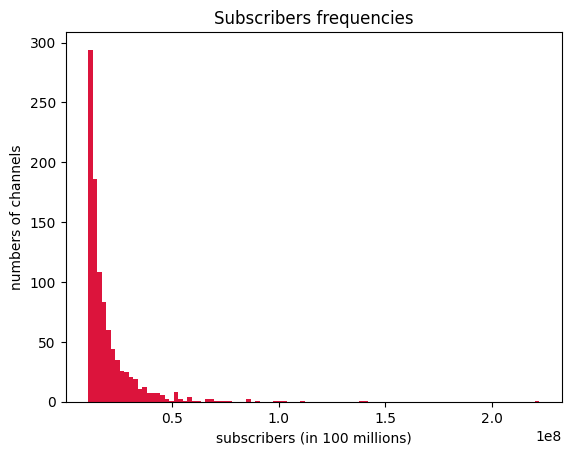

In [110]:
# Plot histogram of subscribers column with 100 bins
plt.hist(subscribe_ana['subscribers'],bins=100,color="crimson")

# Label axes and set title
plt.xlabel("subscribers (in 100 millions)")
plt.ylabel("numbers of channels")
plt.title('Subscribers frequencies')



In [41]:
import plotly.express as px

bar = px.bar(x= subscribe_ana['subscribers'],
        y=subscribe_ana['category'])

bar.show()

In [42]:
# Display row with highest and lowest subscribers count in subscribers column
print(subscribe_ana.loc[subscribe_ana["subscribers"] == subscribe_ana["subscribers"].max()][["Youtuber","subscribers"]])

subscribe_ana.loc[subscribe_ana["subscribers"] == subscribe_ana["subscribers"].min()][["Youtuber","subscribers"]]

   Youtuber  subscribers
0  T-Series    222000000


,Youtuber,subscribers
980,OYUNCAKOYNUYORUM,10900000
981,Brancoala,10900000
982,핑크퐁 (인기 동요・동화),10900000
983,OGGY,10900000
984,JP Plays,10900000
985,TrapMusicHDTV,10900000
986,Games EduUu,10900000
987,Hueva,10900000
988,Dobre Brothers,10900000


In [43]:
# Display Per year statistics
subscribe_ana[['age_count','avg_subperyrs','avg_viewperyrs','avg_vidperyrs']].describe().style.format(thousands=",",precision=1)

,age_count,avg_subperyrs,avg_viewperyrs,avg_vidperyrs
count,989.0,989.0,989.0,989.0
mean,11.6,"1,899,850.6","846,700,447.7",710.9
std,3.8,"1,343,423.1","996,074,197.6","2,467.5"
min,3.0,"578,947.0","27,444.0",0.0
25%,9.0,"1,100,000.0","312,339,820.0",31.0
50%,11.0,"1,538,462.0","583,578,992.0",89.0
75%,14.0,"2,233,333.0","1,027,596,084.0",261.0
max,19.0,"14,183,333.0","11,083,127,110.0","32,323.0"


Text(0.5, 1.0, "Channels' age frequencies")

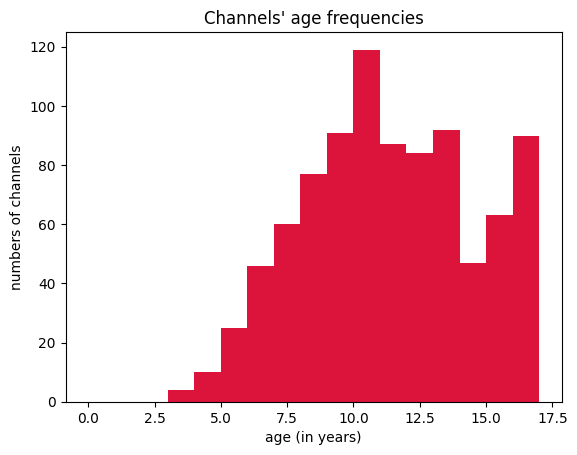

In [44]:
# Plot histogram of age_count column with suitable bins
plt.hist(subscribe_ana['age_count'],bins=np.arange(0,18),color="crimson")

# Label axes and set title
plt.xlabel("age (in years)")
plt.ylabel("numbers of channels")
plt.title("Channels' age frequencies")

Text(0.5, 1.0, 'Subscribers growth rate frequencies')

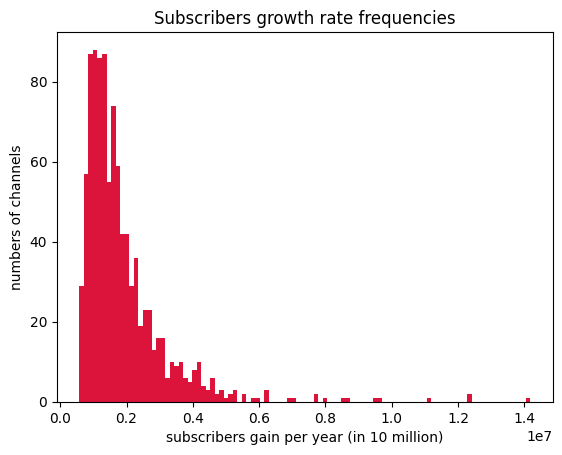

In [45]:
# Plot histogram of avg_subperyrs column with 100 bins
plt.hist(subscribe_ana['avg_subperyrs'],bins=100,color="crimson")

# Label axes and set title
plt.xlabel("subscribers gain per year (in 10 million)")
plt.ylabel("numbers of channels")
plt.title("Subscribers growth rate frequencies")

Text(0.5, 1.0, 'Views growth rate frequencies')

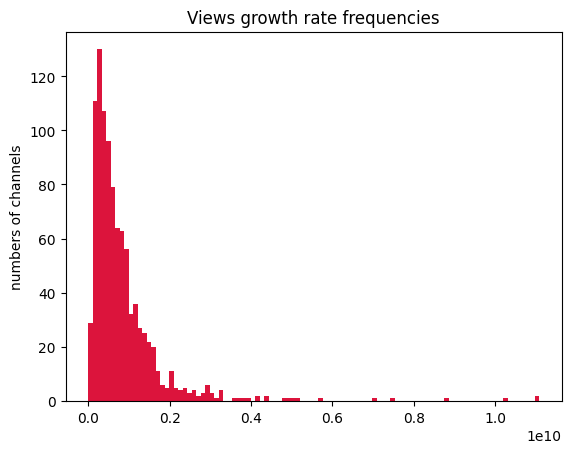

In [46]:
# Plot histogram of avg_viewperyrs column with 100 bins
plt.hist(subscribe_ana['avg_viewperyrs'],bins=100,color="crimson")

# Label axes and set title
plt.ylabel("numbers of channels")
plt.title("Views growth rate frequencies")

In [47]:
# Display efficiency statistics
subscribe_ana[['avg_subpervid','avg_viewpervid']].describe().style.format(thousands=",",precision=1)

,avg_subpervid,avg_viewpervid
count,989.0,989.0
mean,"92,114.7","27,329,746.4"
std,"622,062.8","89,749,246.1"
min,37.0,"31,760.0"
25%,"5,824.0","1,891,809.0"
50%,"18,674.0","5,373,882.0"
75%,"48,991.0","17,905,098.0"
max,"14,900,000.0","1,798,326,959.0"


In [48]:
# Check category value
subscribe_ana['category'].unique()

<StringArray>
[                'Music',             'Education',                 'Shows',
                'Gaming',         'Entertainment',        'People & Blogs',
                'Sports',         'Howto & Style',      'Film & Animation',
       'News & Politics',                'Comedy',              'Trailers',
 'Nonprofits & Activism',          'Unidentified',  'Science & Technology',
                'Movies',        'Pets & Animals',      'Autos & Vehicles',
       'Travel & Events']
Length: 19, dtype: string

In [49]:
# Count number of channels in each category
subscribe_ana['category'].value_counts()

category
Entertainment            240
Music                    222
People & Blogs           119
Gaming                   102
Comedy                    63
Film & Animation          50
Education                 46
Howto & Style             45
News & Politics           27
Unidentified              19
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: count, dtype: Int64

Text(0.5, 1.0, 'Category size')

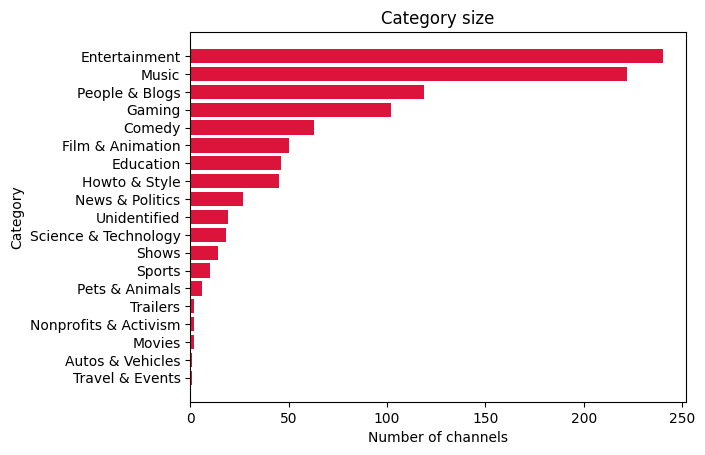

In [111]:
# Plot horizontal bar chart for category size
plt.barh(subscribe_ana['category'].value_counts(ascending=True).index,subscribe_ana['category'].value_counts(ascending=True),color="crimson")

# Label axes and set title
plt.ylabel("Category")
#plt.xticks(rotation=90)
plt.xlabel("Number of channels")
plt.title("Category size")

In [122]:
category = subscribe_ana['category'].value_counts()
fig = px.pie(values=category.values,
             names=category.index,
             color_discrete_sequence=px.colors.sequential.Sunsetdark)
fig.update_traces(textposition='inside',
                  textfont_size=14,
                  textinfo='percent+label',)

fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=12,
                  uniformtext_mode='hide',
                  template ='ggplot2')

fig.show()

In [52]:
# Display category size in percentage
round(subscribe_ana['category'].value_counts(normalize=True),2)

category
Entertainment            0.24
Music                    0.22
People & Blogs           0.12
Gaming                    0.1
Comedy                   0.06
Film & Animation         0.05
Education                0.05
Howto & Style            0.05
News & Politics          0.03
Unidentified             0.02
Science & Technology     0.02
Shows                    0.01
Sports                   0.01
Pets & Animals           0.01
Trailers                  0.0
Nonprofits & Activism     0.0
Movies                    0.0
Autos & Vehicles          0.0
Travel & Events           0.0
Name: proportion, dtype: Float64

C:\Users\yashs\AppData\Local\Temp\ipykernel_32756\1982789482.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




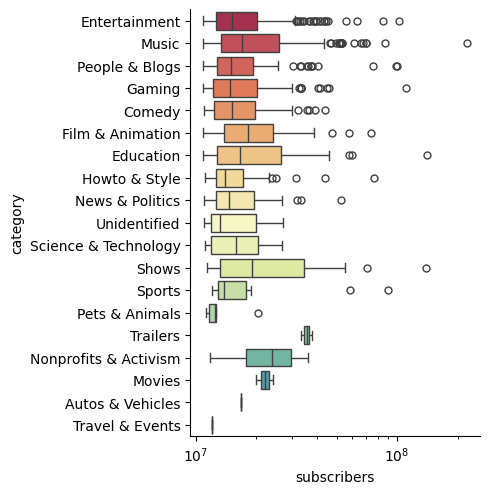

In [53]:
# Create order based on category size
order_fromcount = ['Entertainment','Music','People & Blogs','Gaming','Comedy','Film & Animation','Education','Howto & Style','News & Politics','Unidentified',\
        'Science & Technology','Shows','Sports','Pets & Animals','Trailers','Nonprofits & Activism','Movies','Autos & Vehicles','Travel & Events']

# Plot category box plot of subscribers in each category, sort by order above and ignore outliers
sns.catplot(x="subscribers",y="category",data=subscribe_ana, kind="box",order=order_fromcount, palette='Spectral')
# Code below is for changing x-axis scale to logarithm
plt.xscale("log")

In [54]:
# Create list of indices from top YouTubers in each categories
max_cat = list(subscribe_ana.groupby('category')['subscribers'].max().index)
catmaxindex = []

# Check each categories, find matched indices and store them into list
for i in max_cat :
    catlist = subscribe_ana[subscribe_ana["category"] == i]
    catlistmax = catlist[catlist["subscribers"] == catlist["subscribers"].max()].index
    catmaxindex.extend(catlistmax)

# Display top YouTubers by category and sort by subscribers count
subscribe_ana.loc[catmaxindex][["rank","Youtuber","subscribers","category"]].sort_values("subscribers",ascending = False)

,rank,Youtuber,subscribers,category
0,1,T-Series,222000000,Music
1,3,Cocomelon - Nursery Rhymes,140000000,Education
2,4,SET India,139000000,Shows
3,6,PewDiePie,111000000,Gaming
4,7,MrBeast,102000000,Entertainment
5,8,✿ Kids Diana Show,99700000,People & Blogs
7,11,WWE,90200000,Sports
10,14,5-Minute Crafts,77100000,Howto & Style
12,17,Goldmines,74100000,Film & Animation
28,33,Aaj Tak,52900000,News & Politics


In [105]:
# Filter the dataframe to include only the top YouTubers in each category
top_youtubers = subscribe_ana.loc[catmaxindex][["Youtuber", "subscribers", "category"]]

# Create the treemap
fig = px.treemap(top_youtubers, path=['category', 'Youtuber'], values='subscribers', title='Top YouTubers by Category',
                  color='subscribers', color_continuous_scale='blues')
fig.show()

In [126]:
# Filter the dataframe to get the top YouTubers by category
top_youtubers_by_category = subscribe_ana.loc[catmaxindex][["rank","Youtuber","subscribers","category"]].sort_values("subscribers",ascending = False)

# Create a sunburst chart
fig = px.sunburst(top_youtubers_by_category, path=['category', 'Youtuber'], values='subscribers',
                  color_discrete_sequence=px.colors.sequential.Sunset)

# Update layout for better visualization
fig.update_layout(title='Top YouTubers by Category (Sunburst)',
                  width=800, height=800)

# Show the sunburst chart
fig.show()

In [57]:
import plotly.graph_objects as go
categories = subscribe_ana.groupby('category')['subscribers'].mean().sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.index,
                            color_discrete_sequence= px.colors.sequential.Viridis,
                            title='Mean Subscribers by Category',
                            template = 'ggplot2',
                            text = np.round(categories.values/1000000,2),
                            height=500))

# fig.data[0].marker.line.width = 2
# fig.data[0].marker.line.color = "black"

fig.show()


In [58]:
top_subscribers = subscribe_ana.nlargest(5, 'subscribers')
top_video_views = subscribe_ana.nlargest(5, 'video views')
top_video_counts = subscribe_ana.nlargest(5, 'video count')

print("Top 5 YouTubers based on Subscribers:")
print(top_subscribers[['Youtuber', 'subscribers']])
print("\nTop 5 YouTubers based on Video Views:")
print(top_video_views[['Youtuber', 'video views']])
print("\nTop 5 YouTubers based on Video Counts:")
print(top_video_counts[['Youtuber', 'video count']])


Top 5 YouTubers based on Subscribers:
                     Youtuber  subscribers
0                    T-Series    222000000
1  Cocomelon - Nursery Rhymes    140000000
2                   SET India    139000000
3                   PewDiePie    111000000
4                     MrBeast    102000000

Top 5 YouTubers based on Video Views:
                      Youtuber   video views
0                     T-Series  198459090822
1   Cocomelon - Nursery Rhymes  135481339848
2                    SET India  125764252686
13                    Sony SAB   82473581441
6                  Like Nastya   81963845811

Top 5 YouTubers based on Video Counts:
            Youtuber  video count
806         GMA News       329711
107          IndiaTV       237971
768         KOMPASTV       225232
95          ABP NEWS       224455
568  Thairath Online       209097


C:\Users\yashs\AppData\Local\Temp\ipykernel_32756\4043548223.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\yashs\AppData\Local\Temp\ipykernel_32756\4043548223.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\yashs\AppData\Local\Temp\ipykernel_32756\4043548223.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



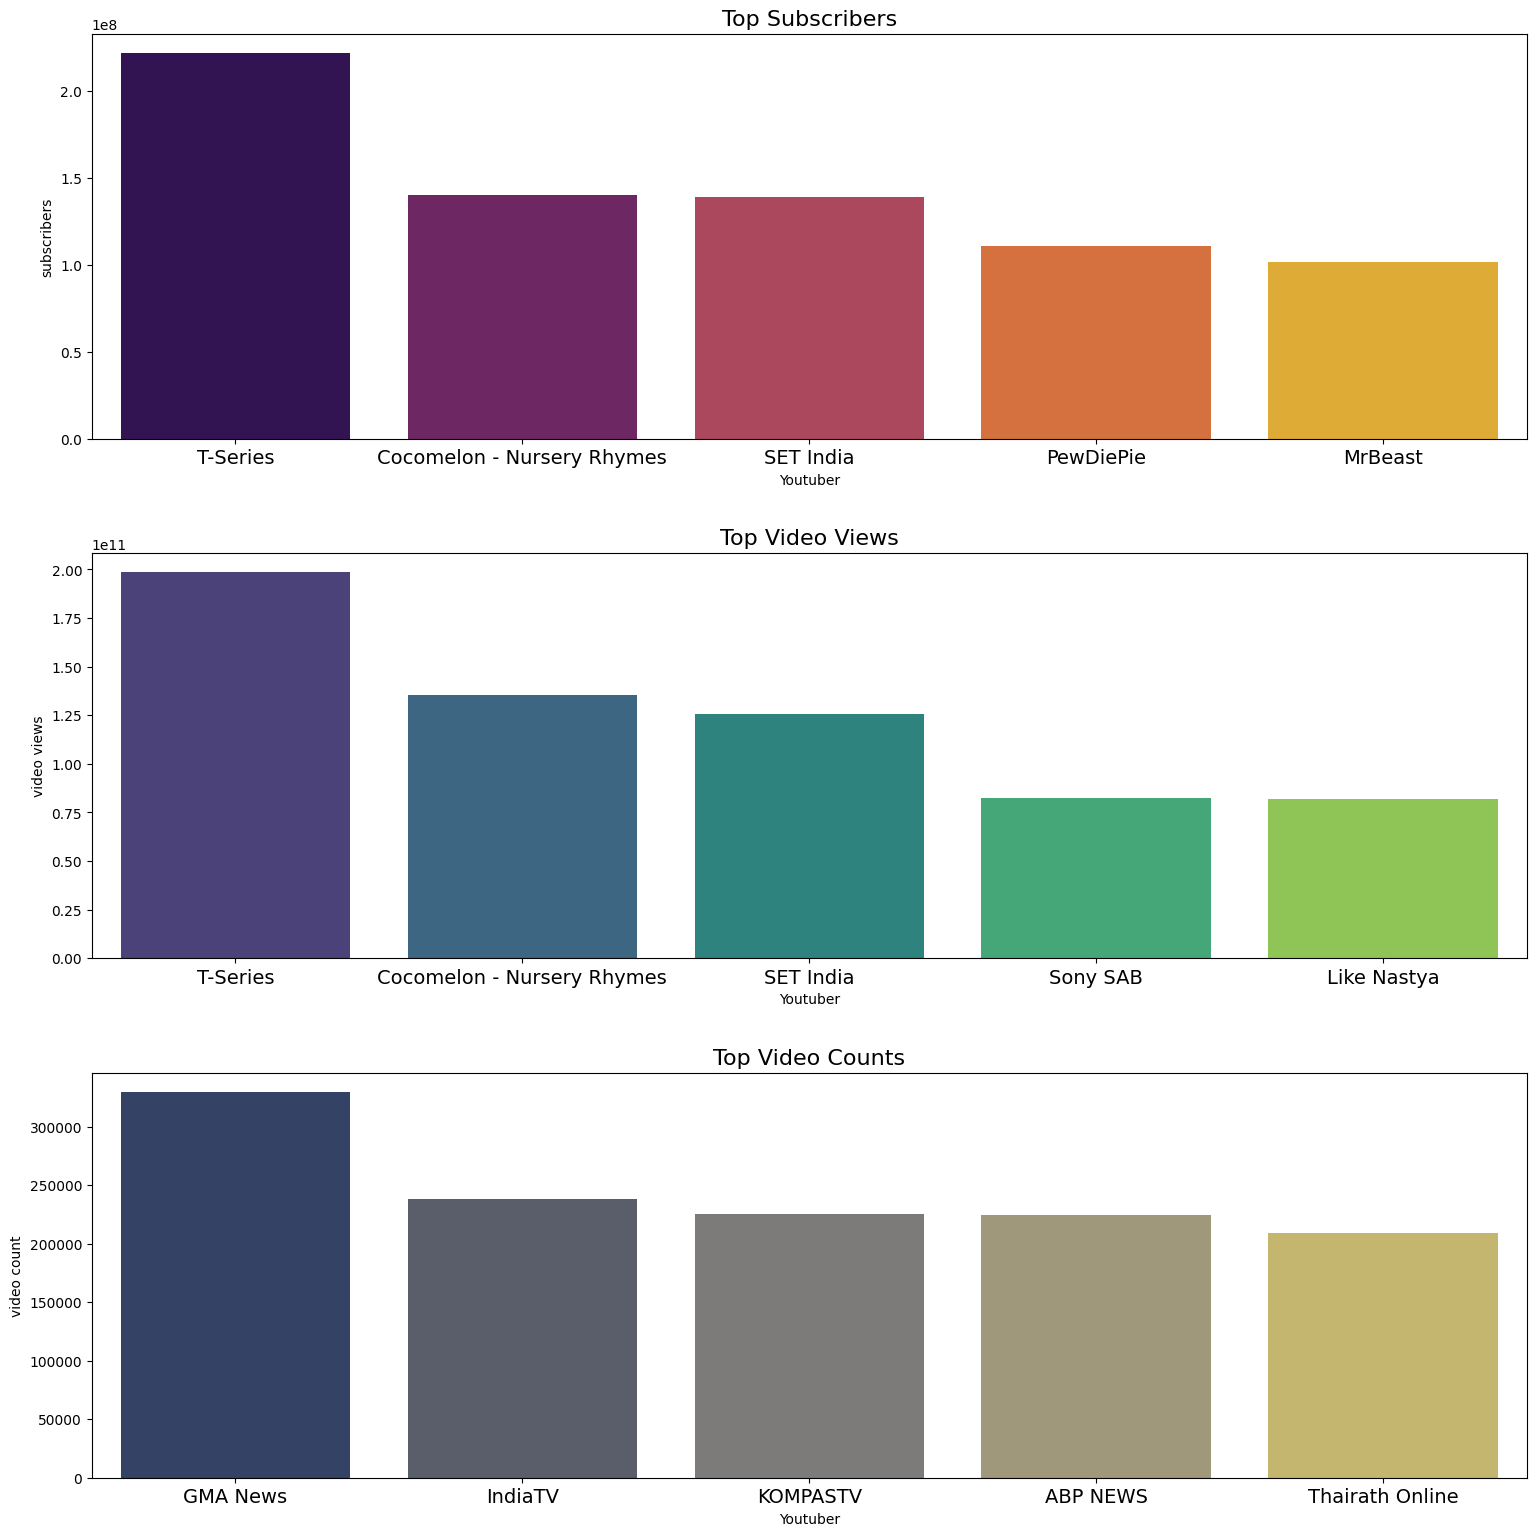

In [67]:
def barplt(x, y, data, palette, axs, title):
    ax = sns.barplot(x=x,
                     y=y,
                     hue=x,
                     data=data,
                     dodge=False,
                     palette=palette,  
                     ax=axs).set_title(title, fontsize=16)

subscribers_sorted = subscribe_ana.sort_values('subscribers', ascending=False)[:5]
video_views_sorted = subscribe_ana.sort_values('video views', ascending=False)[:5]
video_counts_sorted = subscribe_ana.sort_values('video count', ascending=False)[:5]

fig, ((ax1), (ax2), (ax3)) = plt.subplots(ncols=1, nrows=3)
fig.set_size_inches(16, 16)

barplt("Youtuber", "subscribers", subscribers_sorted, "inferno", ax1, 'Top Subscribers')
barplt("Youtuber", "video views", video_views_sorted, "viridis", ax2, 'Top Video Views')
barplt("Youtuber", "video count", video_counts_sorted, "cividis", ax3, 'Top Video Counts')

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=14)
ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=14)

fig.tight_layout(pad=3.0)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


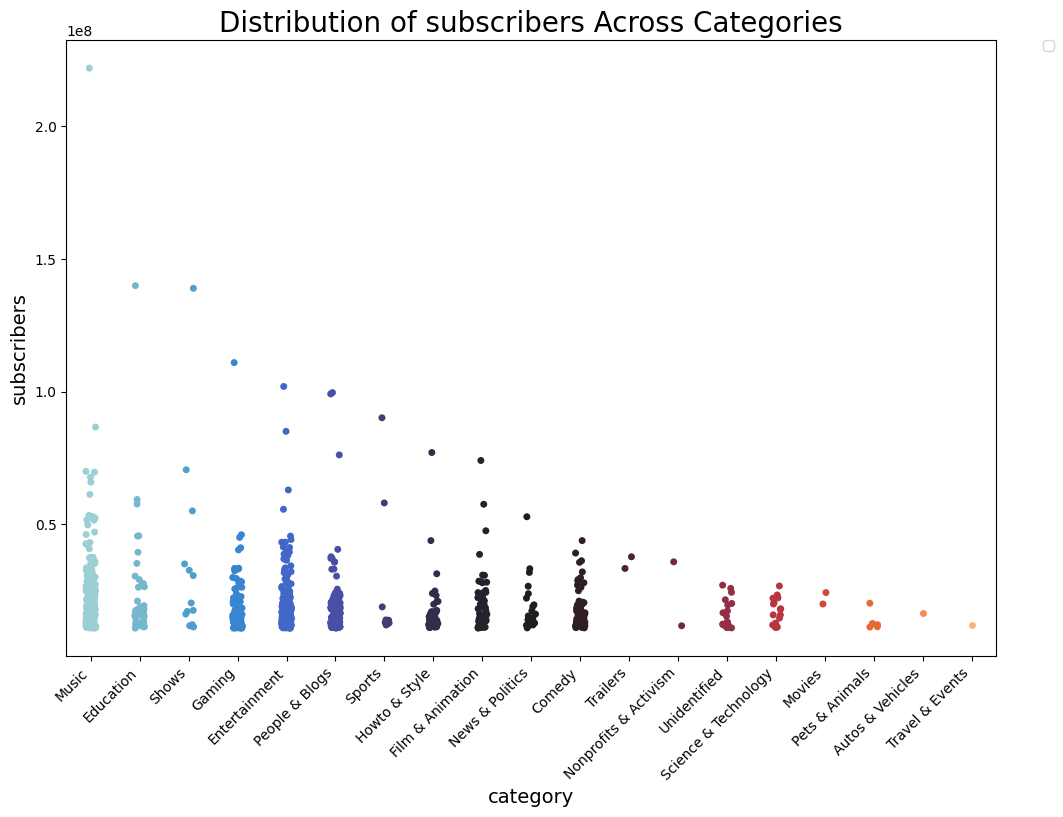

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


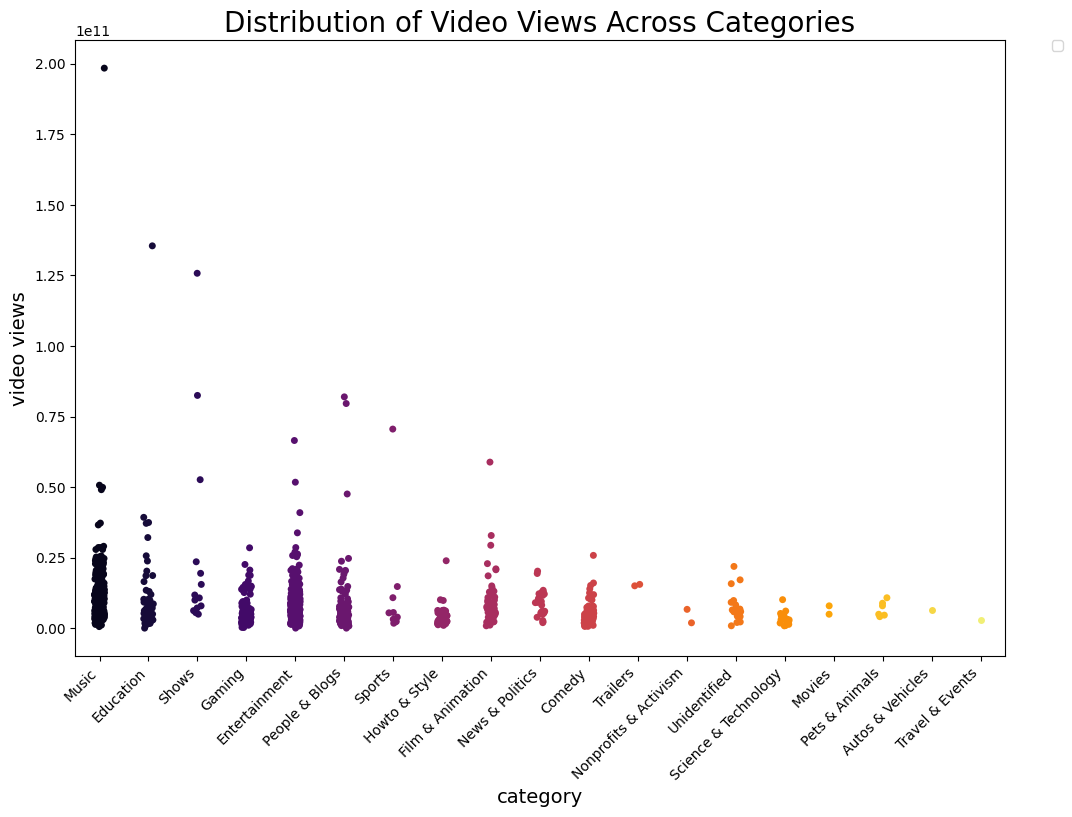

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


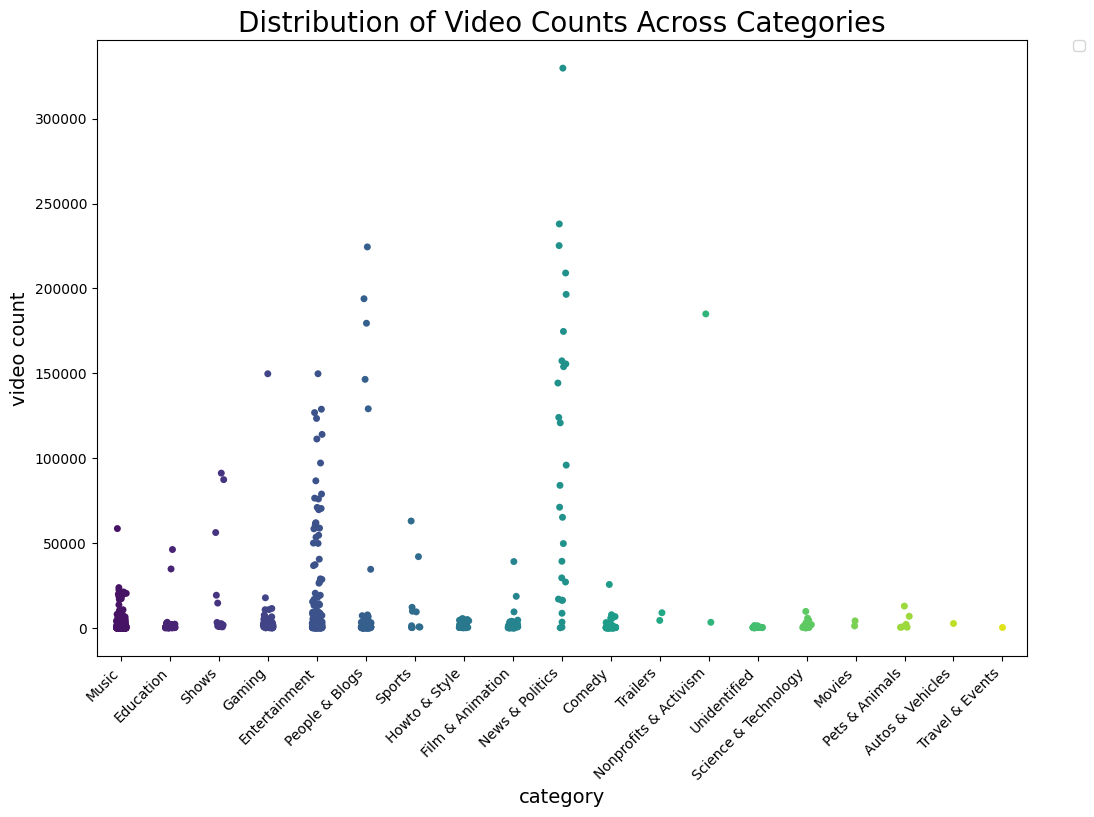

In [88]:
def stripplot_video_views_counts(data, xcol, ycol, huecol, title, palette):
    plt.figure(figsize=(12, 8))
    sns.stripplot(data=data, x=xcol, y=ycol, hue=huecol,palette=palette)
    plt.title(title, fontsize=20)
    plt.xlabel(xcol, fontsize=14)
    plt.ylabel(ycol, fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=45, ha='right')
    plt.show()

stripplot_video_views_counts(subscribe_ana, 'category', 'subscribers', 'category', 'Distribution of subscribers Across Categories',palette='icefire')

stripplot_video_views_counts(subscribe_ana, 'category', 'video views', 'category', 'Distribution of Video Views Across Categories',palette='inferno')

stripplot_video_views_counts(subscribe_ana, 'category', 'video count', 'category', 'Distribution of Video Counts Across Categories',palette='viridis')

Text(0.5, 1.0, 'Video Views with Video Counts')

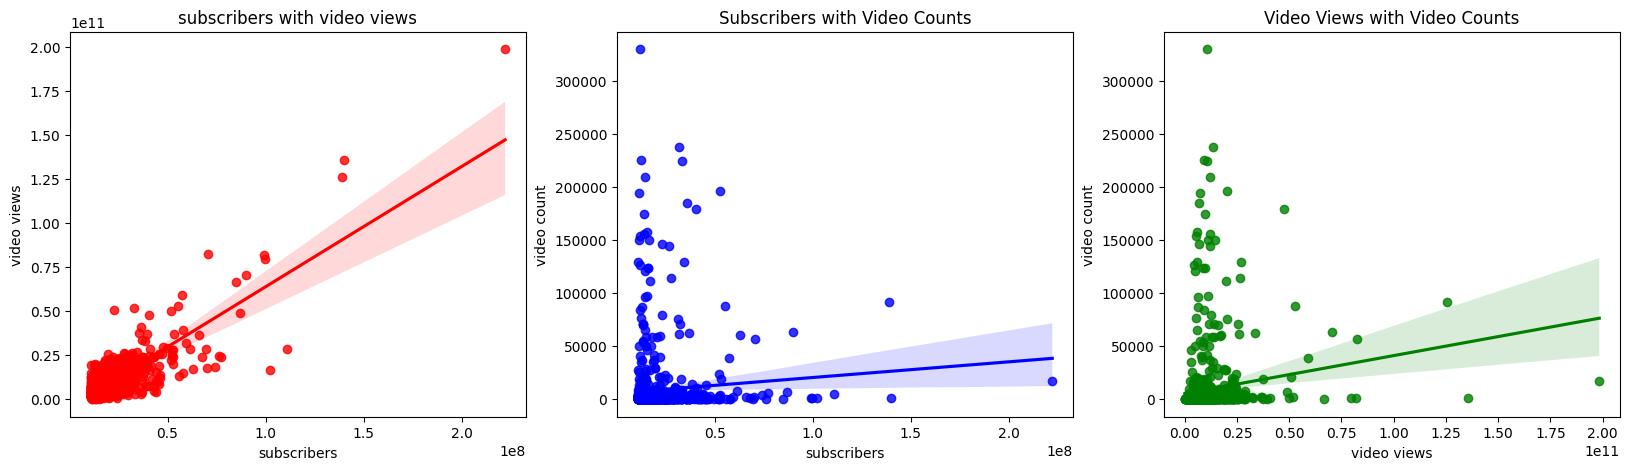

In [87]:
fig, ((ax1,ax2,ax3)) = plt.subplots(ncols=3,nrows=1)
fig.set_size_inches(20,5)

sns.regplot(x=subscribe_ana['subscribers'],
                y=subscribe_ana['video views'],
                ax=ax1,
                color='red').set_title('subscribers with video views')
sns.regplot(x=subscribe_ana['subscribers'],
                y=subscribe_ana['video count'],
                ax=ax2,
                color='blue').set_title('Subscribers with Video Counts')
sns.regplot(x=subscribe_ana['video views'],
                y=subscribe_ana['video count'],
                ax=ax3,
                color='green').set_title('Video Views with Video Counts')

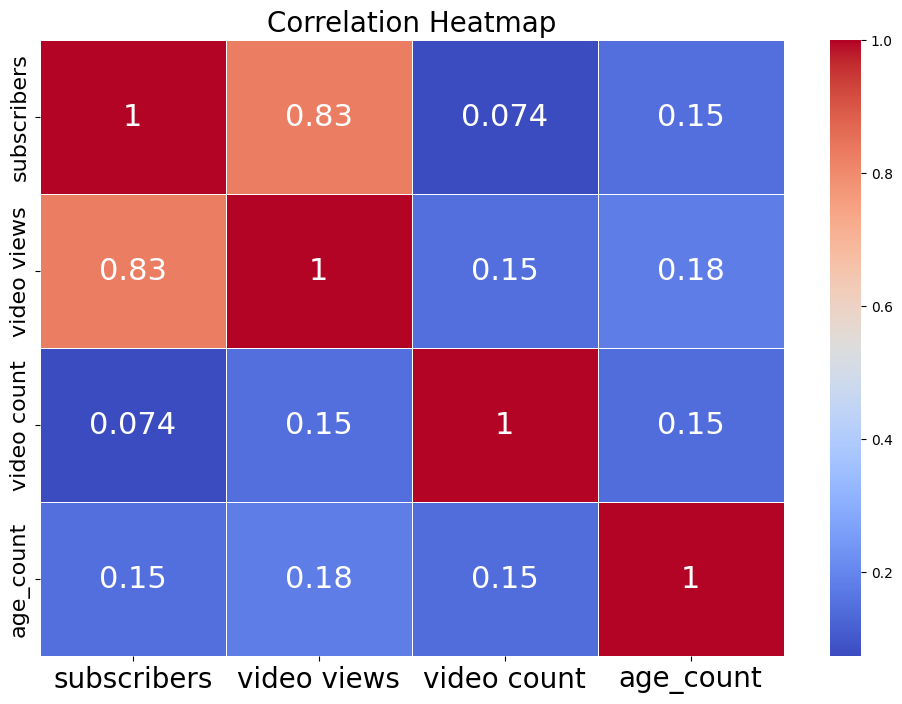

In [127]:
def correlation_heatmap(data):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"fontsize":22})
    plt.title("Correlation Heatmap", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=16)
    plt.show()

correlation_heatmap(subscribe_ana[['subscribers', 'video views', 'video count','age_count']])
